<a href="https://colab.research.google.com/github/Requenamar3/datawrangling/blob/main/DataWrangling_Template_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Structural Analysis (import libs, data, investigate the structure)
2. Quality Analysis (dupes, nulls, missing values, bad data, outliers)
3. Content Investigation (distribution, patterns, feature relationships)
4. EDA: Univariate, Bivariate, Multivariate
5. Feature Selection w/ Data (missing values,unused cols, uncorrelated and low variance features, multicollinearity)
6. Feature Selection with Models (coeffients, p-value, VIF)
7. Feature Importance (RFE, PCA, LDA)
8. Normalize / Encode (OHE, Normalize/Standardize, Pipelines)
9. Data Leakage, Resampling, K-Fold Cross Validation / Feature Engineering

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api)

[Scikit-Learn Documentation](https://scikit-learn.org/stable/supervised_learning.html)

[NumPy Documentation](https://numpy.org/doc/)

[Python Tutor](https://pythontutor.com/visualize.html#mode=edit)

In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt
#!pip unfreeze requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('display.max_columns', None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

1.23.5
1.2.2


In [ ]:
%%time
%env
print("Hellow World")

Hellow World
CPU times: user 1.48 ms, sys: 0 ns, total: 1.48 ms
Wall time: 1.48 ms


# Structural Analysis

In [ ]:
# Standard Imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
# Import Data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import certifi
from sklearn.datasets import fetch_openml

# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)
# Extract feature matrix X and show 5 random samples
df_X = dataset["frame"]
df_X.sample(5)

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
338724  2015621501980                         1           9.0   
214256  201537EA90528                         2          19.0   
77970   201506E003441                         3           9.0   
210677  2015360092241                         2           9.0   
267068  2015450025011                         2           1.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
338724                      0.0                9.0   
214256                      0.0               18.0   
77970                       0.0               10.0   
210677                      0.0                3.0   
267068                      0.0               18.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
338724                               0.0                1.0   
214256                               0.0                1.0   
77970                                0.0                1.0   
210677                               0.0                0.0   
267068                               0.0                0.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
338724                       0.0                        0.0   
214256                       0.0                        0.0   
77970                        0.0                        0.0   
210677                       0.0                        0.0   
267068                       0.0                        0.0   

        Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
338724                          0.0                         0.0   
214256                          0.0                         0.0   
77970                           0.0                         0.0   
210677                          0.0                         0.0   
267068                          0.0                         0.0   

        1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
338724                  3.0                           1.0   
214256                  2.0                           1.0   
77970                   0.0                           1.0   
210677                  2.0                           1.0   
267068                  1.0                           1.0   

        Journey_Purpose_of_Driver Sex_of_Driver Age_of_Driver  \
338724                        6.0           2.0          76.0   
214256                        6.0           1.0          30.0   
77970                         6.0           1.0          26.0   
210677                        2.0           2.0          35.0   
267068                        6.0           1.0          40.0   

       Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
338724               11.0                   NaN              NaN   
214256                6.0                1870.0              2.0   
77970                 6.0                1796.0              1.0   
210677                6.0                1753.0              2.0   
267068                7.0                   NaN              NaN   

        Age_of_Vehicle Driver_Home_Area_Type  Location_Easting_OSGR  \
338724             NaN                   1.0               258699.0   
214256            11.0                   1.0               645154.0   
77970             14.0                   1.0               380790.0   
210677             8.0                   1.0               562642.0   
267068             NaN                   1.0                    NaN   

        Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
338724                189360.0  -4.040908  51.585330          62.0   
214256                275205.0   1.595824  52.320150          37.0   
77970                 384620.0  -2.290094  53.358105           6.0   
210677                319595.0   0.408256  52.749500          36.0   
267068                     NaN        NaN        NaN           NaN   

        Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
338724                3.0                 2.

In [ ]:
df_X.sample(5).T

253786         279433  \
Accident_Index                      2015440026604  2015460257641   
Vehicle_Reference_df_res                        2              2   
Vehicle_Type                                  9.0            1.0   
Towing_and_Articulation                       0.0            0.0   
Vehicle_Manoeuvre                             9.0           18.0   
...                                           ...            ...   
Bus_or_Coach_Passenger                        0.0            0.0   
Pedestrian_Road_Maintenance_Worker            0.0            0.0   
Casualty_Type                                   9              1   
Casualty_Home_Area_Type                       1.0            1.0   
Casualty_IMD_Decile                           4.0            1.0   

                                           329005         322056  \
Accident_Index                      201560S047437  2015548392915   
Vehicle_Reference_df_res                        1              1   
Vehicle_Type                                  5.0            9.0   
Towing_and_Articulation                       0.0            0.0   
Vehicle_Manoeuvre                            13.0            5.0   
...                                           ...            ...   
Bus_or_Coach_Passenger                        0.0            0.0   
Pedestrian_Road_Maintenance_Worker            0.0            0.0   
Casualty_Type                                   9              9   
Casualty_Home_Area_Type                       NaN            3.0   
Casualty_IMD_Decile                           NaN            7.0   

                                           173556  
Accident_Index                      201523N035365  
Vehicle_Reference_df_res                        2  
Vehicle_Type                                  9.0  
Towing_and_Articulation                       0.0  
Vehicle_Manoeuvre                            17.0  
...                                           ...  
Bus_or_Coach_Passenger                        0.0  
Pedestrian_Road_Maintenance_Worker            0.0  
Casualty_Type                                   9  
Casualty_Home_Area_Type                       1.0  
Casualty_IMD_Decile                          10.0  

[67 rows x 5 columns]

In [ ]:
# df_airbnb = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv")
# df_airbnb.head()

In [ ]:
df_X.shape

(363243, 67)

In [ ]:
# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

float64    50
object     11
int64       6
dtype: int64

In [ ]:
df_X.dtypes.T

Accident_Index                         object
Vehicle_Reference_df_res                int64
Vehicle_Type                          float64
Towing_and_Articulation               float64
Vehicle_Manoeuvre                     float64
                                       ...   
Bus_or_Coach_Passenger                float64
Pedestrian_Road_Maintenance_Worker    float64
Casualty_Type                           int64
Casualty_Home_Area_Type                object
Casualty_IMD_Decile                    object
Length: 67, dtype: object

## Categorical Features

In [ ]:
# Display categorical features
# Identify and treat any obvious data type issues.
df_X.select_dtypes(exclude="number").head()

Accident_Index Sex_of_Driver Age_of_Driver Age_Band_of_Driver  \
0  201501BS70001           1.0          None               None   
1  201501BS70002           1.0           NaN                NaN   
2  201501BS70004           1.0          30.0                6.0   
3  201501BS70005           1.0           NaN                NaN   
4  201501BS70008           1.0          48.0                8.0   

  Driver_Home_Area_Type        Date   Time Local_Authority_(Highway)  \
0                  None  12/01/2015  18:45                 E09000020   
1                   NaN  12/01/2015  07:50                 E09000020   
2                   1.0  12/01/2015  18:08                 E09000020   
3                   NaN  13/01/2015  07:40                 E09000020   
4                   1.0  09/01/2015  07:30                 E09000020   

  LSOA_of_Accident_Location Casualty_Home_Area_Type Casualty_IMD_Decile  
0                 E01002825                    None                None  
1                 E01002820                     1.0                 3.0  
2                 E01002833                     1.0                 6.0  
3                 E01002874                     1.0                 2.0  
4                 E01002814                     1.0                 3.0

In [ ]:
df_X['Sex_of_Driver'].nunique()

3

In [ ]:
df_X['Sex_of_Driver'].unique()

array(['1.0', '2.0', '3.0'], dtype=object)

In [ ]:
df_X['Sex_of_Driver'] = df_X['Sex_of_Driver'].astype('float')

In [ ]:
df_X['Age_of_Driver'] = df_X['Age_of_Driver'].astype('float')

In [ ]:
df_X['Sex_of_Driver'].dtypes

dtype('float64')

In [ ]:
df_X.describe(exclude='number')

Accident_Index  Age_Band_of_Driver  Driver_Home_Area_Type        Date  \
count          363243            327374.0               302534.0      319866   
unique         140056                11.0                    3.0         365   
top     201543P296025                 6.0                    1.0  14/02/2015   
freq             1332             76126.0               237651.0        2144   

          Time Local_Authority_(Highway) LSOA_of_Accident_Location  \
count   319822                    319866                    298758   
unique    1439                       204                     25979   
top      17:30                 E10000017                 E01028497   
freq      2972                      8457                      1456   

        Casualty_Home_Area_Type  Casualty_IMD_Decile  
count                  323448.0             293666.0  
unique                      3.0                 10.0  
top                         1.0                  1.0  
freq                   259258.0              34783.0

##Numerical Features

<Figure size 1500x400 with 0 Axes>

[Text(0, 0, 'Urban_or_Rural_Area'),
 Text(1, 0, 'Was_Vehicle_Left_Hand_Drive?'),
 Text(2, 0, 'Sex_of_Casualty'),
 Text(3, 0, 'Casualty_Class'),
 Text(4, 0, 'Accident_Severity'),
 Text(5, 0, 'Car_Passenger'),
 Text(6, 0, 'Sex_of_Driver'),
 Text(7, 0, 'Did_Police_Officer_Attend_Scene_of_Accident'),
 Text(8, 0, 'Casualty_Severity'),
 Text(9, 0, 'Pedestrian_Crossing-Human_Control'),
 Text(10, 0, 'Pedestrian_Road_Maintenance_Worker'),
 Text(11, 0, 'Junction_Control'),
 Text(12, 0, '1st_Point_of_Impact'),
 Text(13, 0, 'Bus_or_Coach_Passenger'),
 Text(14, 0, 'Light_Conditions'),
 Text(15, 0, 'Road_Surface_Conditions'),
 Text(16, 0, 'Carriageway_Hazards'),
 Text(17, 0, 'Road_Type'),
 Text(18, 0, '2nd_Road_Class'),
 Text(19, 0, 'Pedestrian_Crossing-Physical_Facilities'),
 Text(20, 0, '1st_Road_Class'),
 Text(21, 0, 'Skidding_and_Overturning'),
 Text(22, 0, 'Towing_and_Articulation'),
 Text(23, 0, 'Journey_Purpose_of_Driver'),
 Text(24, 0, 'Day_of_Week'),
 Text(25, 0, 'Special_Conditions_at_Site

Text(0.5, 1.0, 'Unique values per frequency')

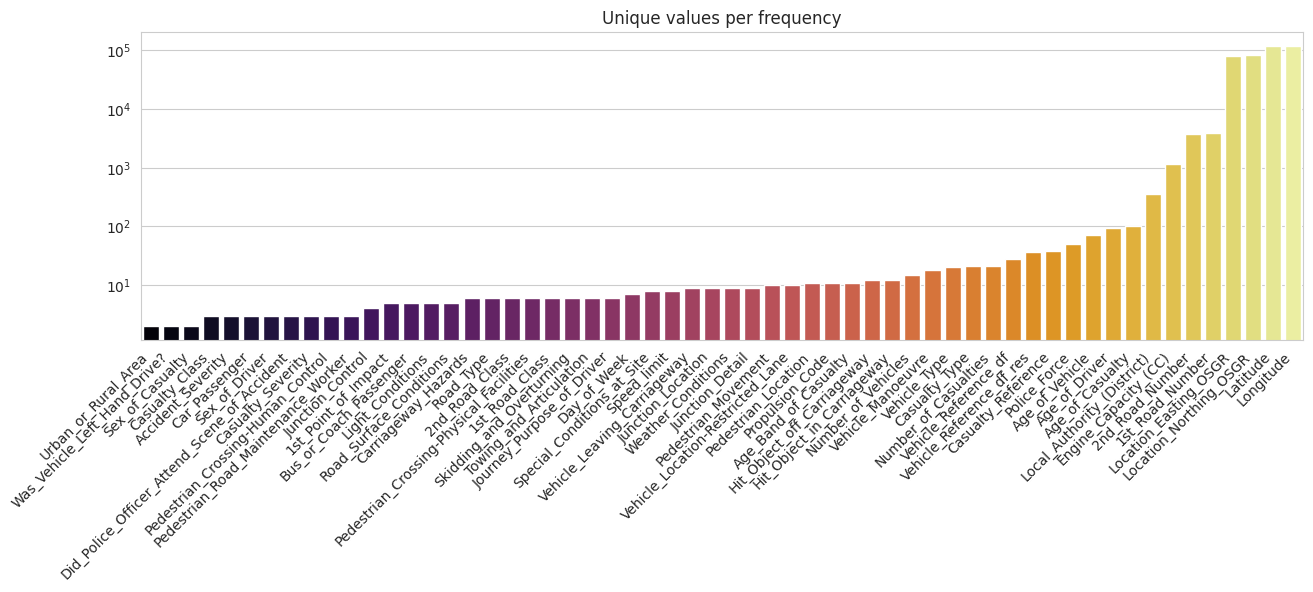

In [ ]:
# Evaluation of Numeric Features
# 2 unique values: binary
# 3 to ~ 10 unique values: ordinal (cat)
# 10+ unique values continuous
 # For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  int64  
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

In [ ]:
df_X.describe()

Vehicle_Reference_df_res   Vehicle_Type  Towing_and_Articulation  \
count             363243.000000  363181.000000            362864.000000   
mean                   1.696203       9.756953                 0.029766   
std                    1.487094       8.315189                 0.294127   
min                    1.000000       1.000000                 0.000000   
25%                    1.000000       9.000000                 0.000000   
50%                    1.000000       9.000000                 0.000000   
75%                    2.000000       9.000000                 0.000000   
max                   37.000000      98.000000                 5.000000   

       Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
count      363059.000000                     363067.000000      363159.000000   
mean           12.607326                          0.109233           2.609361   
std             6.218689                          0.903131           3.249245   
min             1.000000                          0.000000           0.000000   
25%             6.000000                          0.000000           0.000000   
50%            17.000000                          0.000000           1.000000   
75%            18.000000                          0.000000           6.000000   
max            18.000000                          9.000000           8.000000   

       Skidding_and_Overturning  Hit_Object_in_Carriageway  \
count             363067.000000              363080.000000   
mean                   0.188139                   0.307480   
std                    0.714243                   1.595551   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   0.000000   
max                    5.000000                  12.000000   

       Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
count                363084.000000               363242.000000   
mean                      0.366689                    0.546699   
std                       1.374107                    2.094845   
min                       0.000000                    0.000000   
25%                       0.000000                    0.000000   
50%                       0.000000                    0.000000   
75%                       0.000000                    0.000000   
max                       8.000000                   11.000000   

       1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
count        363037.000000                 361760.000000   
mean              1.775279                      1.005396   
std               1.121195                      0.073258   
min               0.000000                      1.000000   
25%               1.000000                      1.000000   
50%               1.000000                      1.000000   
75%               3.000000                      1.000000   
max               4.000000                      2.000000   

       Journey_Purpose_of_Driver  Sex_of_Driver  Age_of_Driver  \
count              363221.000000  363243.000000  327374.000000   
mean                    4.796350       1.397607      40.314826   
std                     2.017689       0.590480      16.148168   
min                     1.000000       1.000000       1.000000   
25%                     2.000000       1.000000      27.000000   
50%                     6.000000       1.000000      38.000000   
75%                     6.000000       2.000000      51.000000   
max                     6.000000       3.000000      97.000000   

       Engine_Capacity_(CC)  Propulsion_Code  Age_of_Vehicle  \
count         269897.000000    270607.000000   256138.000000   
mean            1930.519161         1.510903        8.003014   
std             1675.649521         0.850093        4.964995   
min               13.000000         1.000000        1.0

# Quality Investigation

##Dupes

In [ ]:
%time
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=['Accident_Index'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
You seem to have 22 duplicates in your database.


In [ ]:
df_X.shape

(363243, 67)

In [ ]:
#  Extract column names of all features, except 'Accident_Index'
# you may want to remove the target as well
columns_to_consider = df_X.drop(labels=['Accident_Index'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X.drop_duplicates(subset=columns_to_consider, inplace=True)
df_X.shape

(363221, 67)

##Missing Values

###Per Sample / Row

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

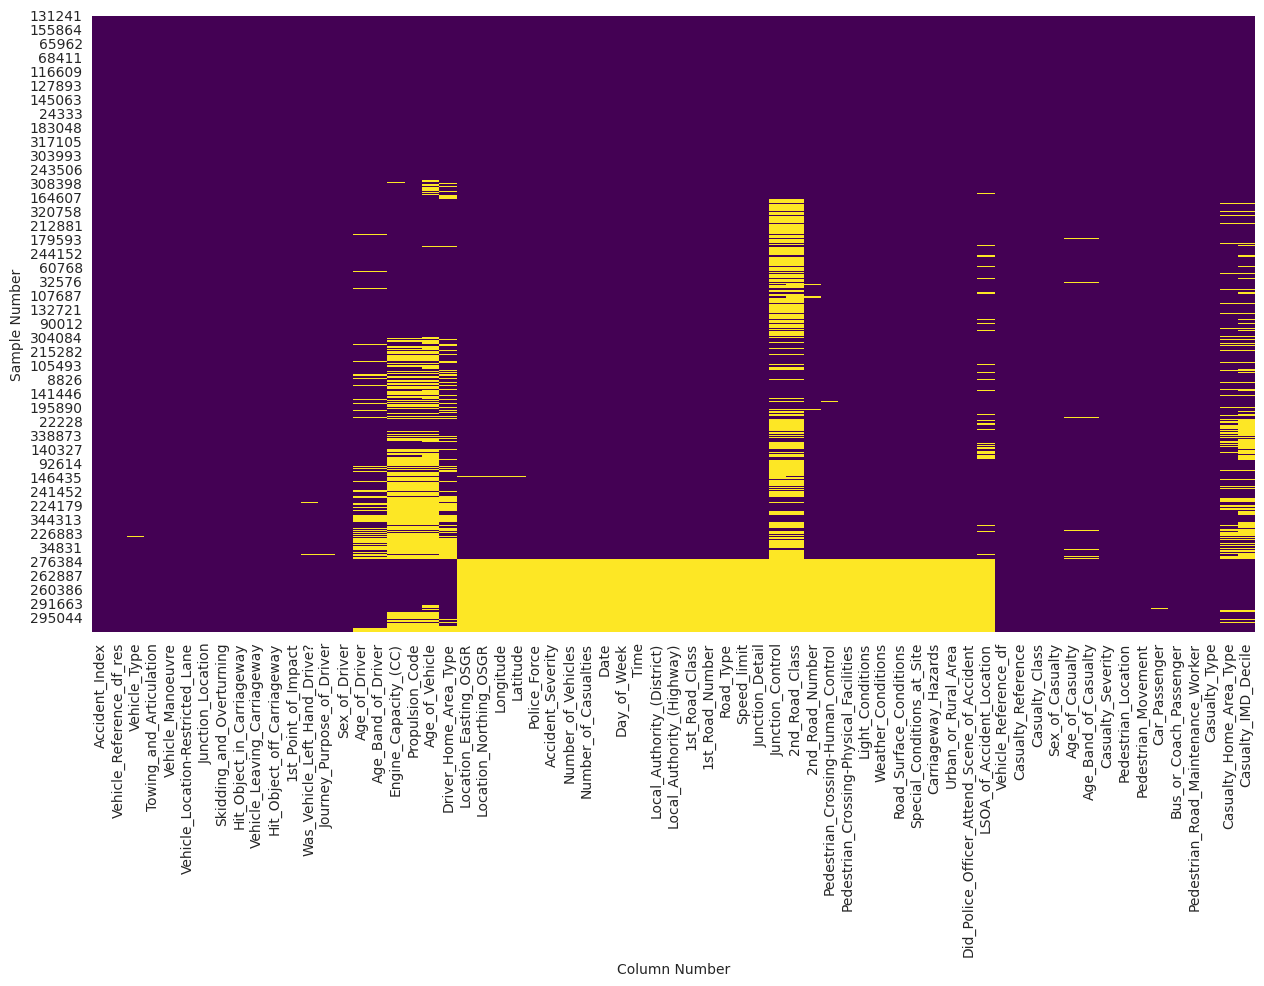

In [ ]:
# Missing Values (per sample/row)
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

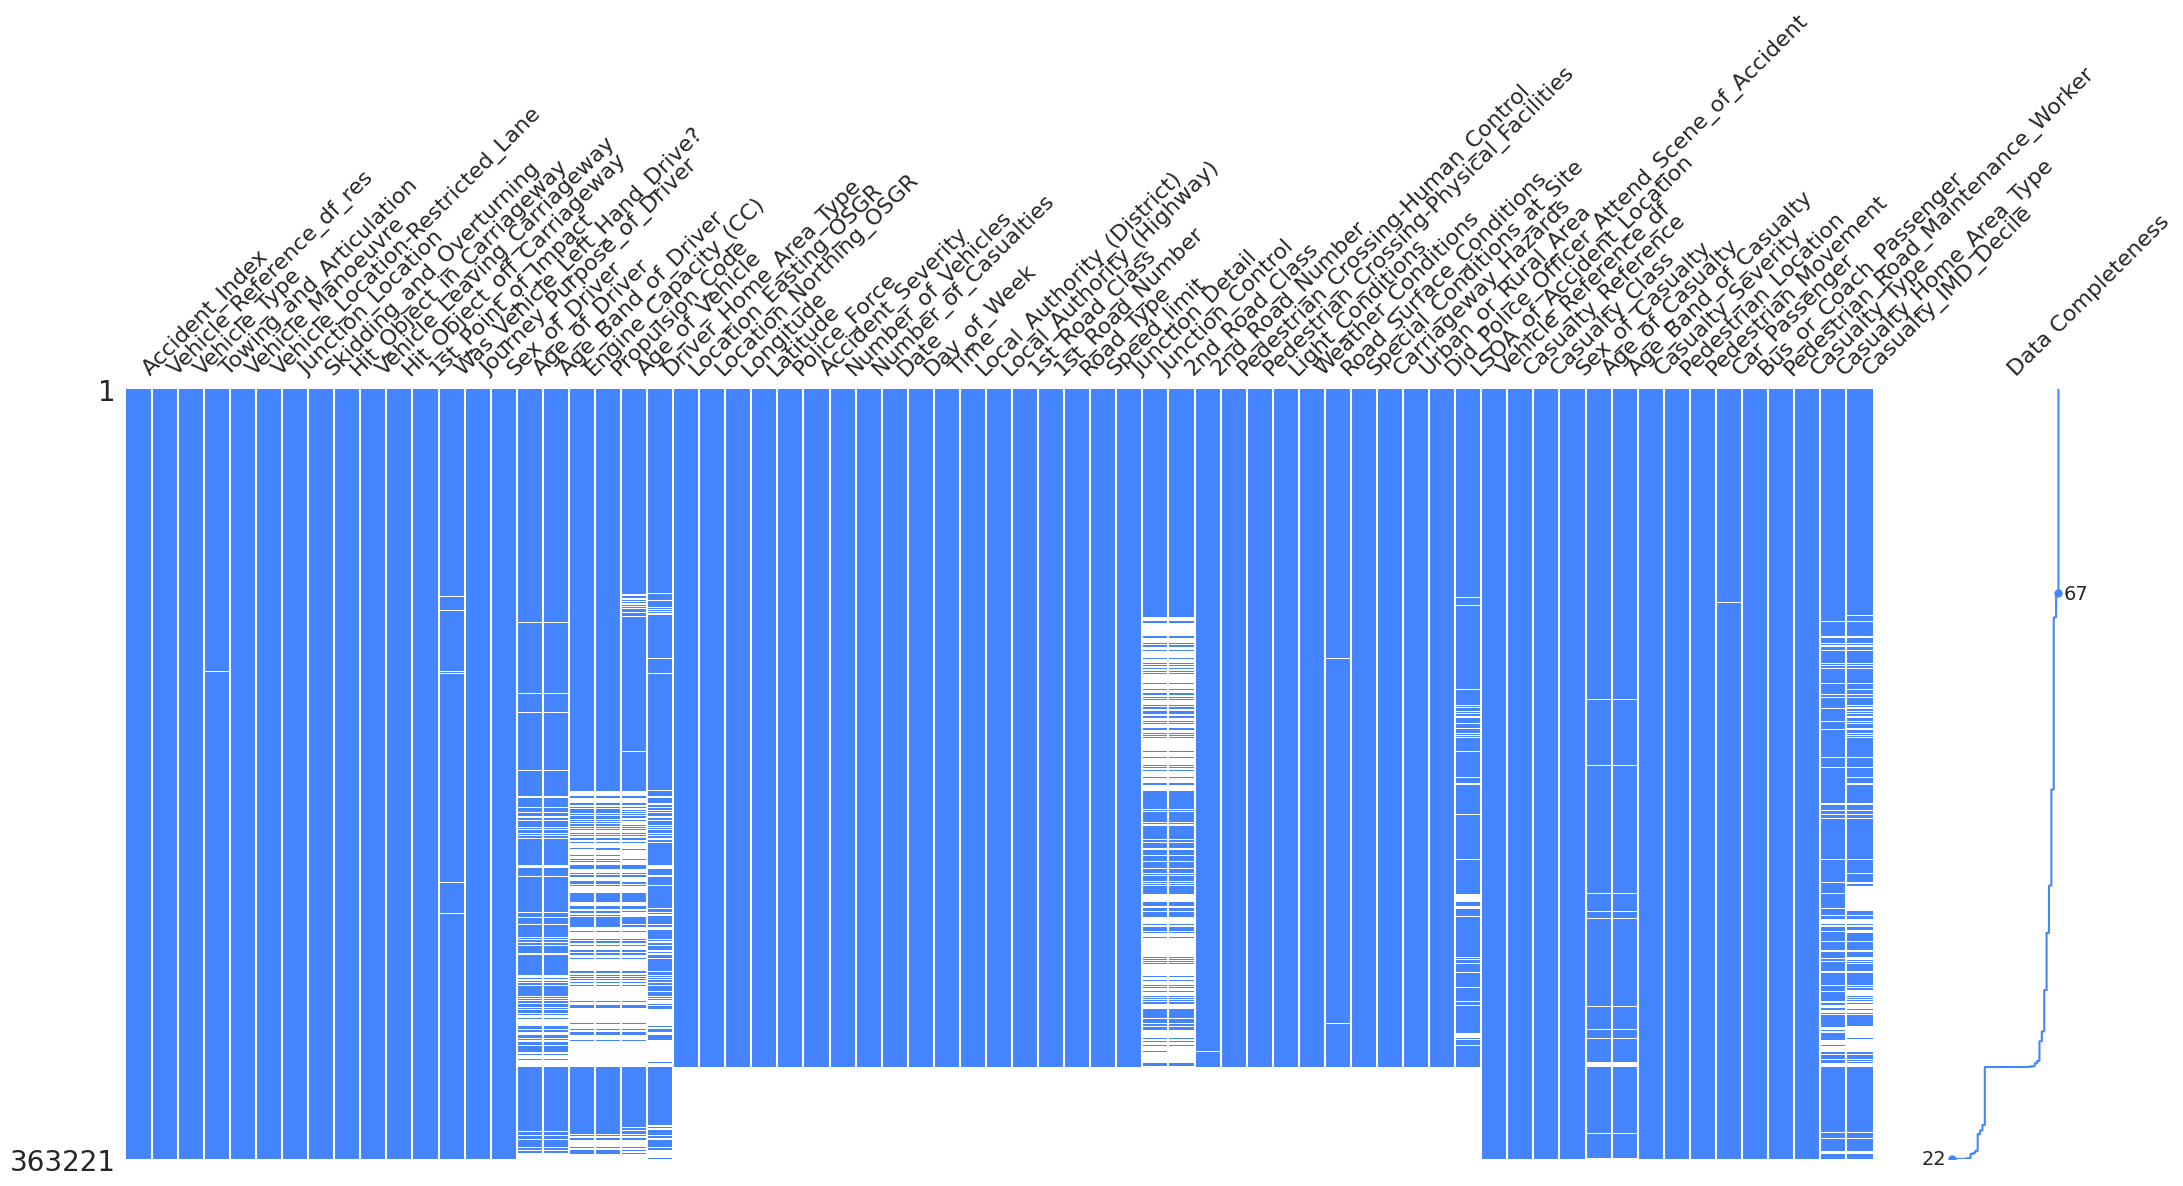

In [ ]:
# This figure shows on the y-axis each of the 360'000 individual samples, and on the x-axis if any of the 67 features contains a missing value. While this is already a useful plot, an even better approach is to use the missingno library, to get a plot like this one:
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
# Drop rows that are 20% or more empty (you set the threshold)
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

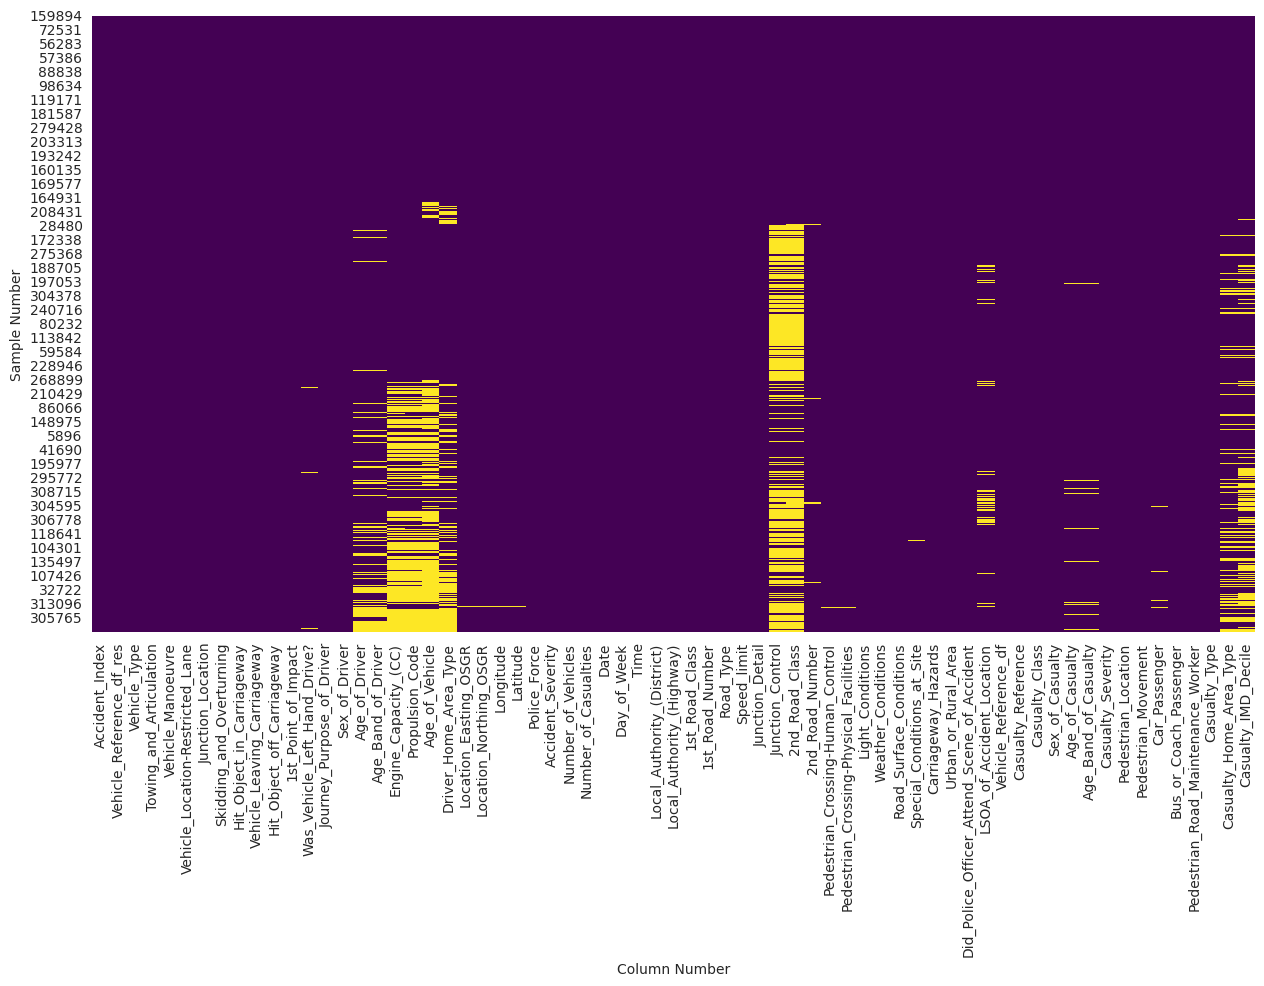

In [ ]:
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

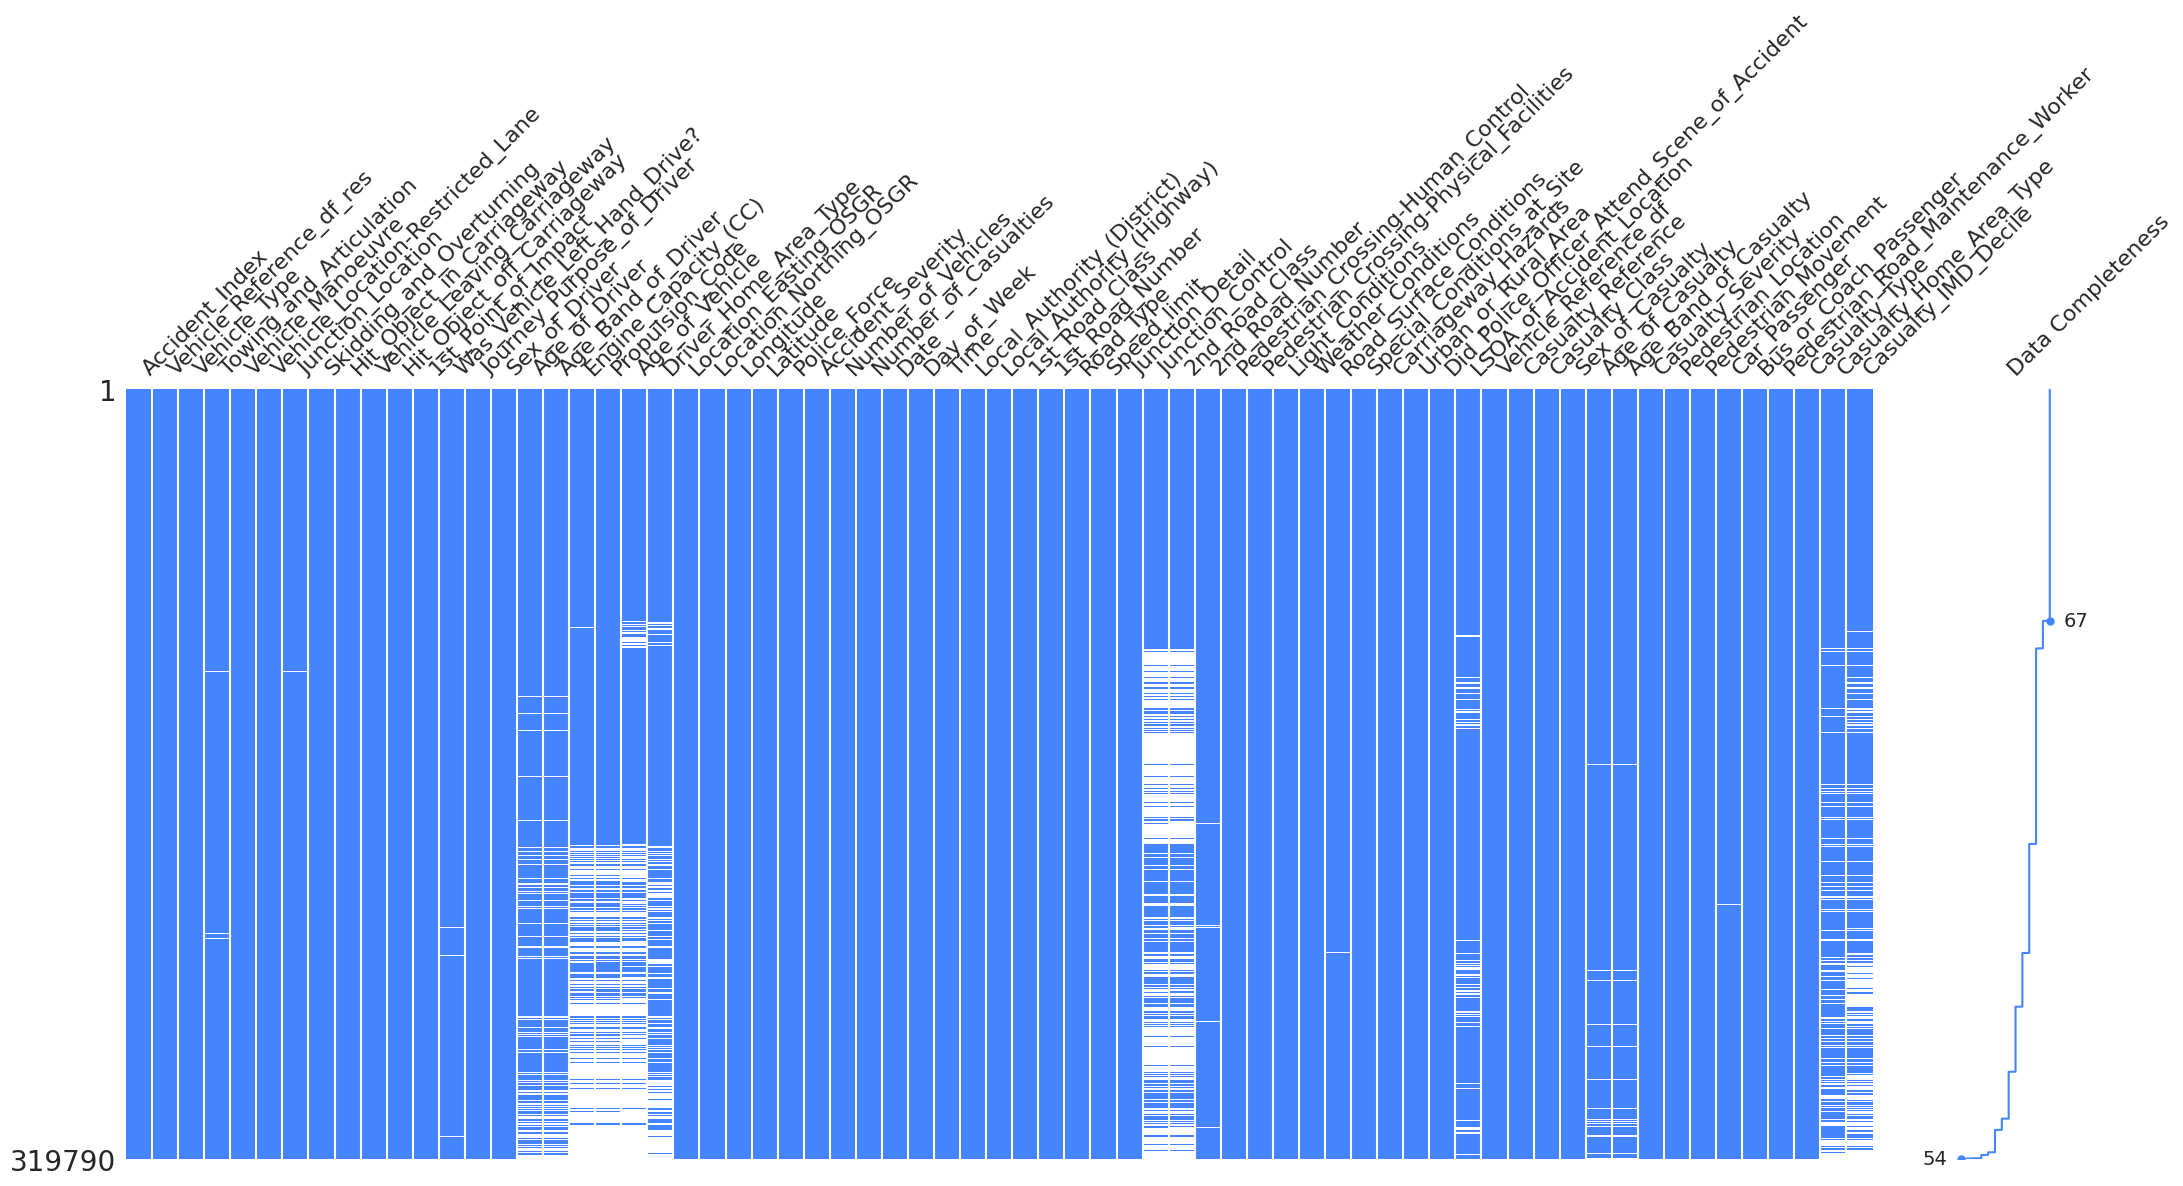

In [ ]:
# This figure shows on the y-axis each of the 360'000 individual samples, and on the x-axis if any of the 67 features contains a missing value. While this is already a useful plot, an even better approach is to use the missingno library, to get a plot like this one:
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

###Per Feature / Column

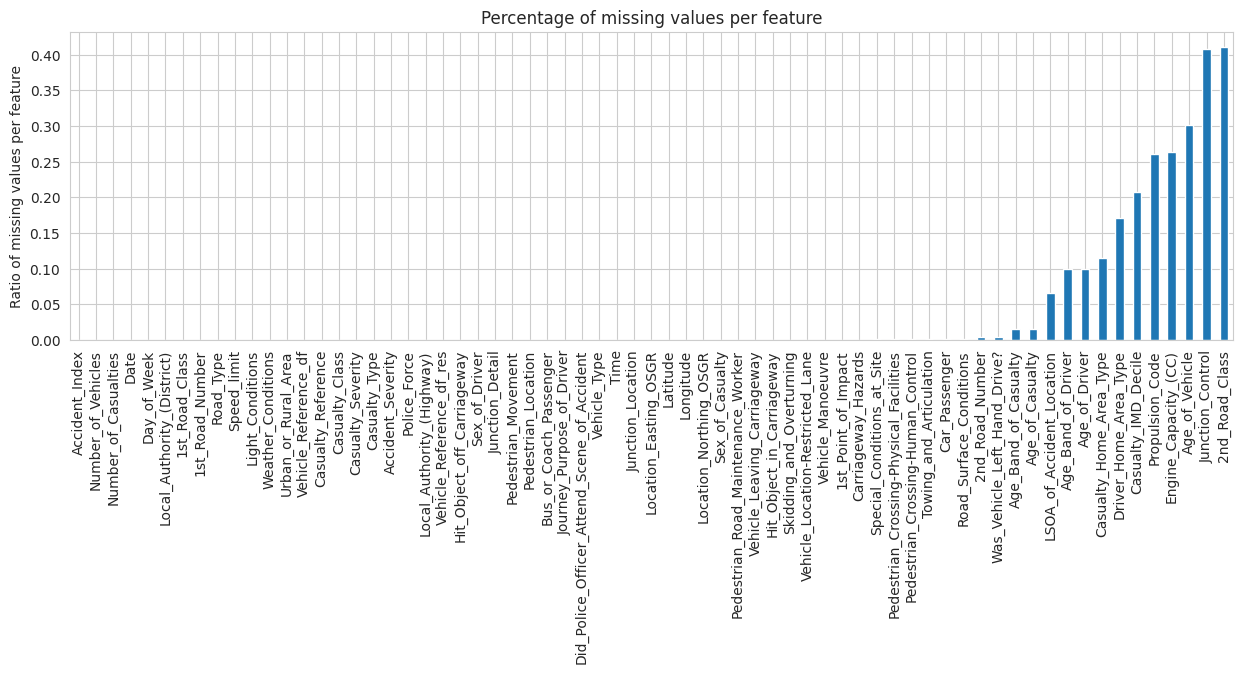

In [ ]:
# Per Feature / column
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

CPU times: user 2.87 s, sys: 415 ms, total: 3.29 s
Wall time: 3.17 s


<Axes: >

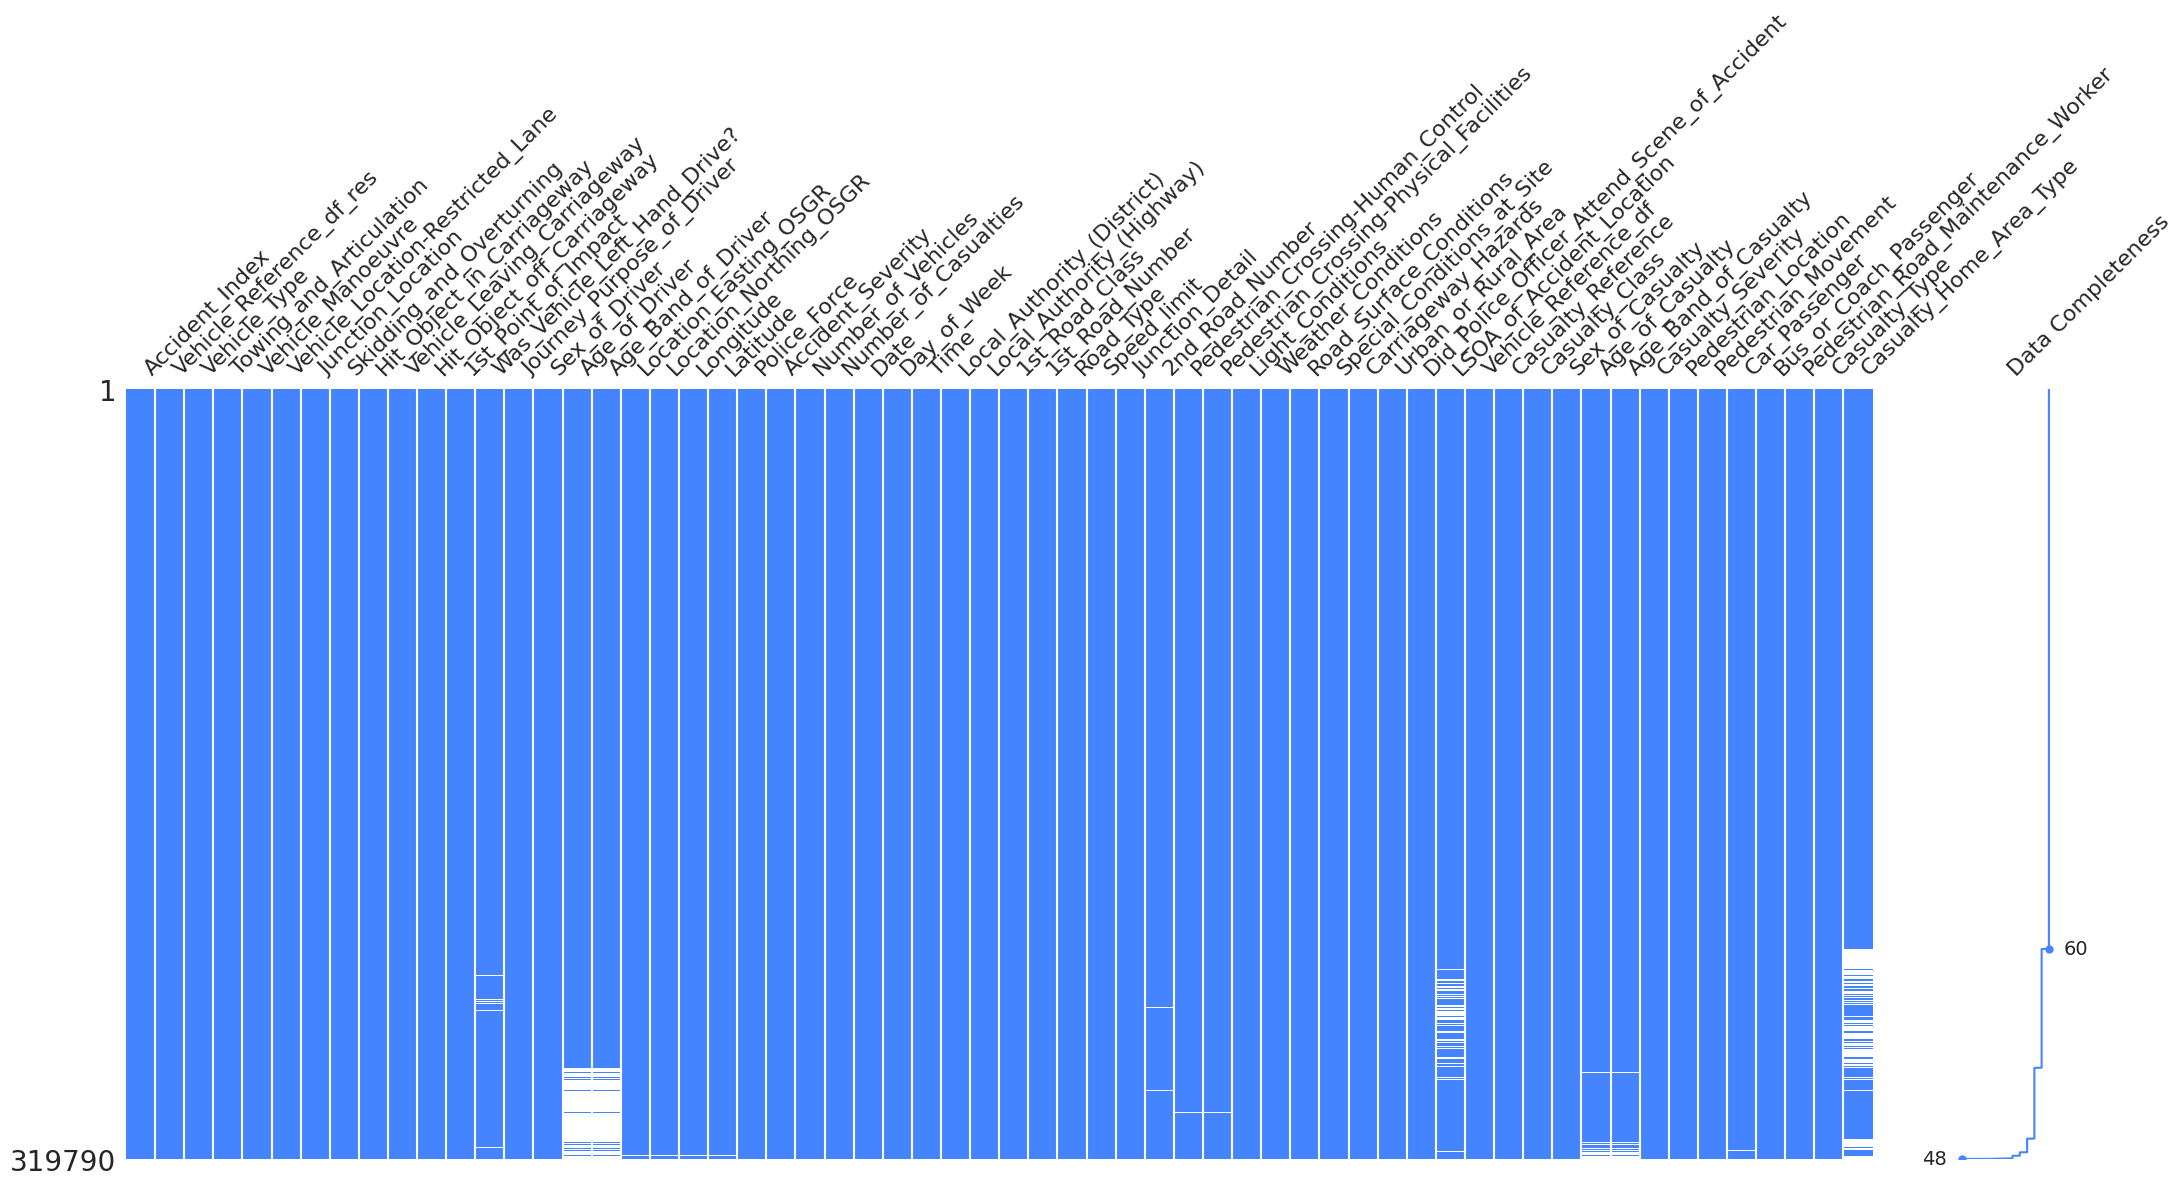

In [ ]:
%%time
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

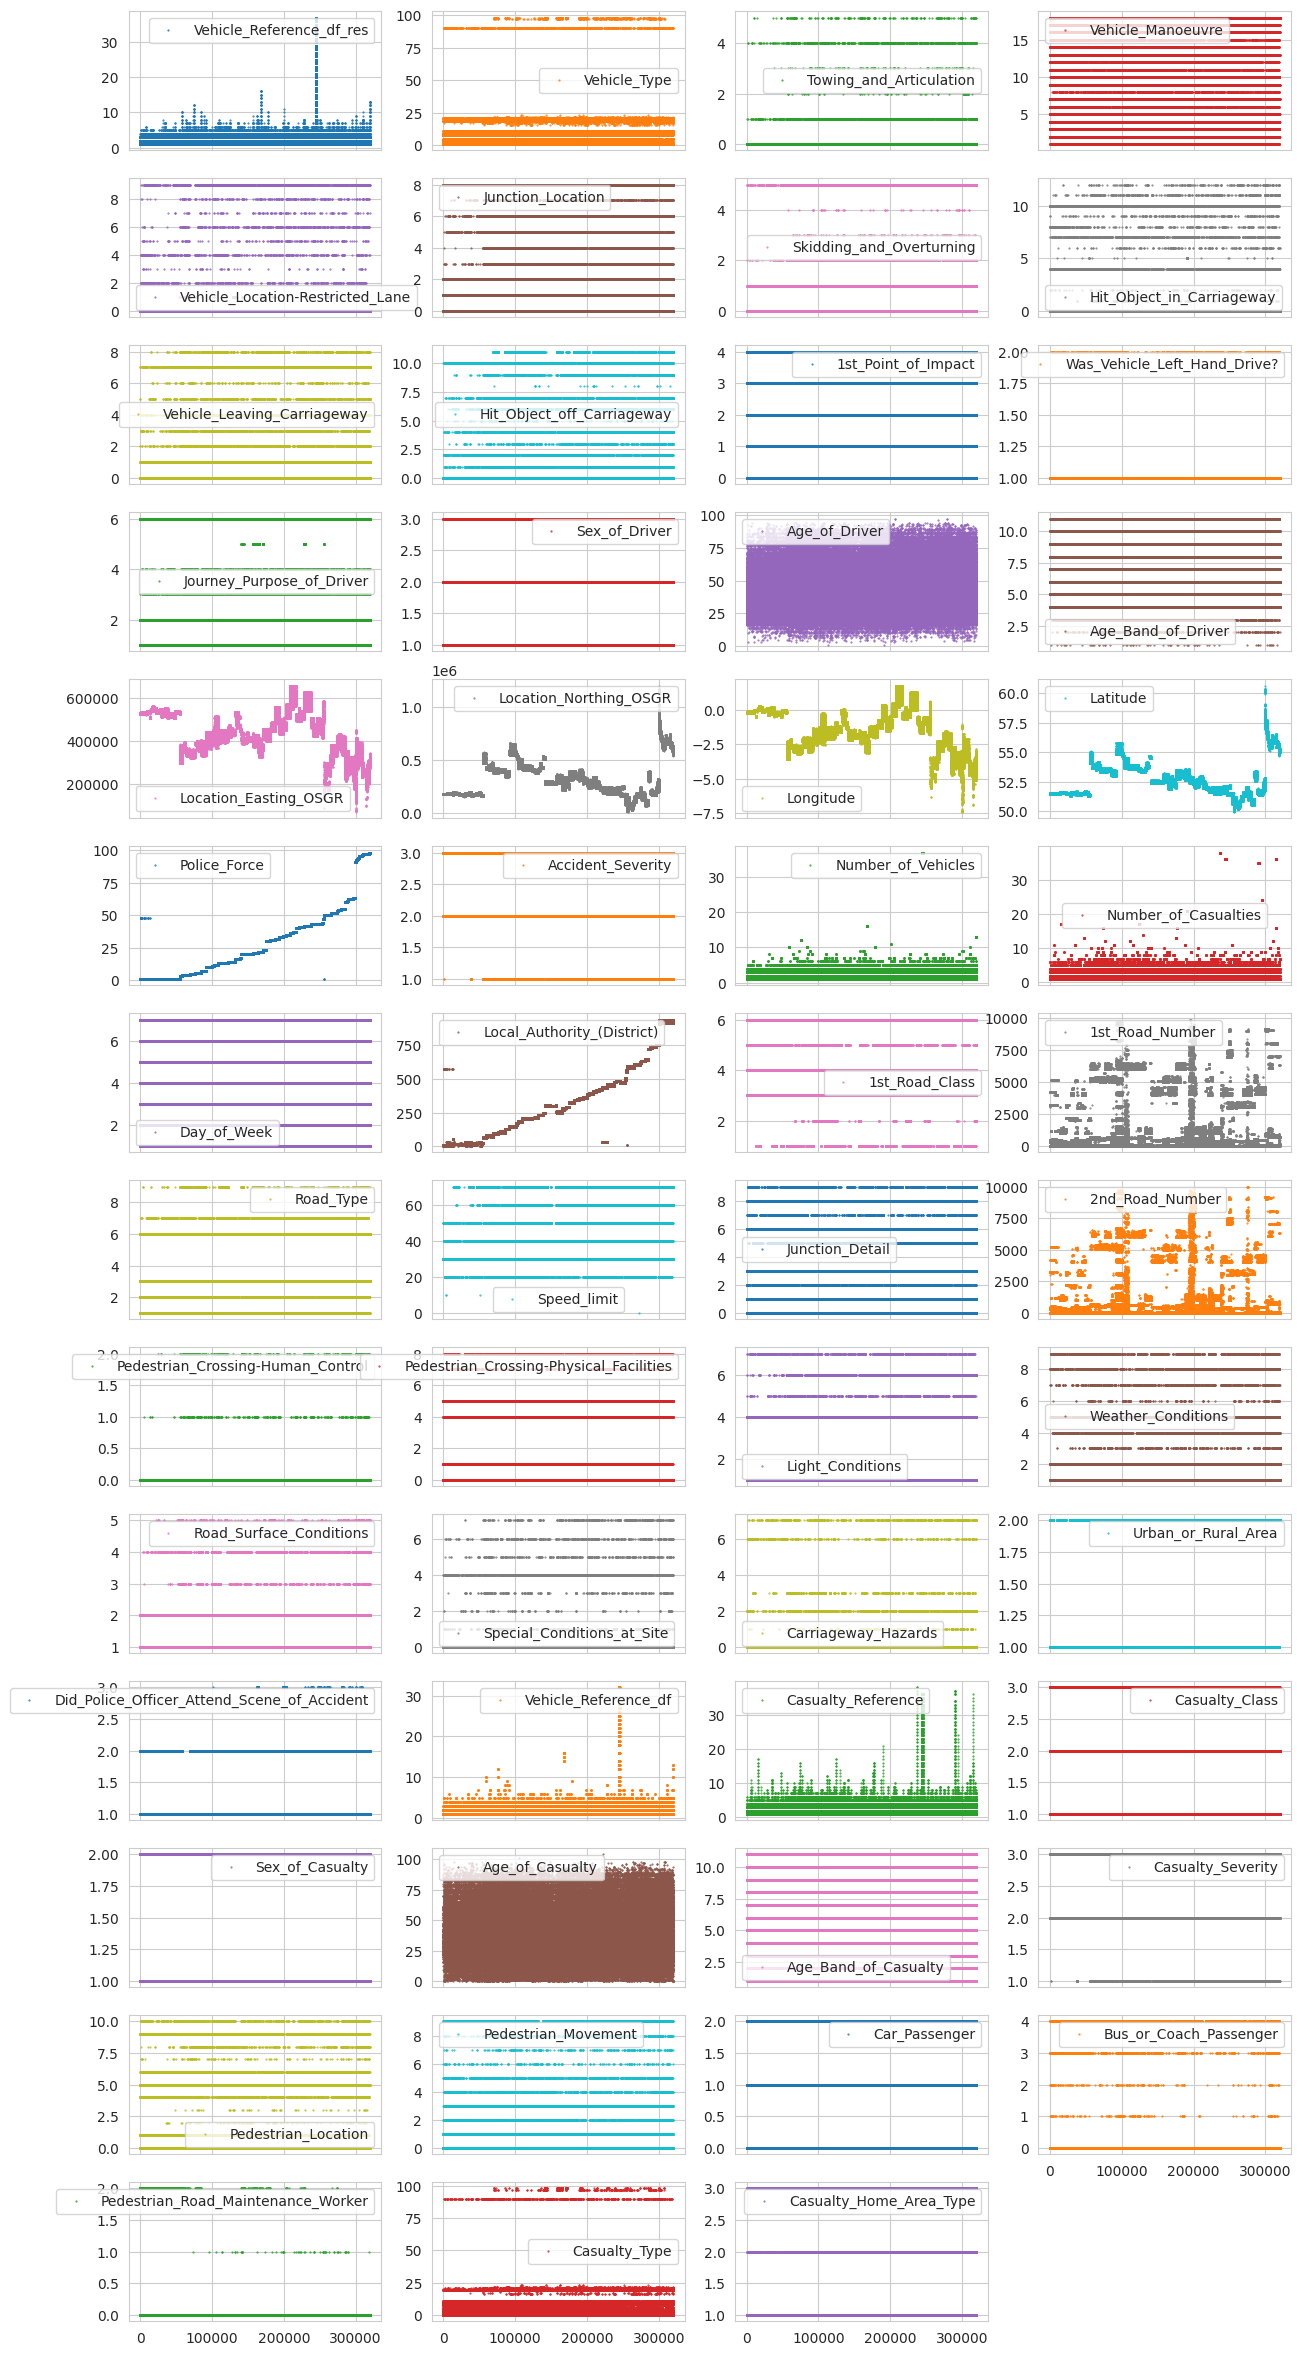

In [ ]:
# Plot all numeric features:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

# Content Investigation

##Feature Distribution

CPU times: user 6.76 s, sys: 282 ms, total: 7.04 s
Wall time: 6.97 s


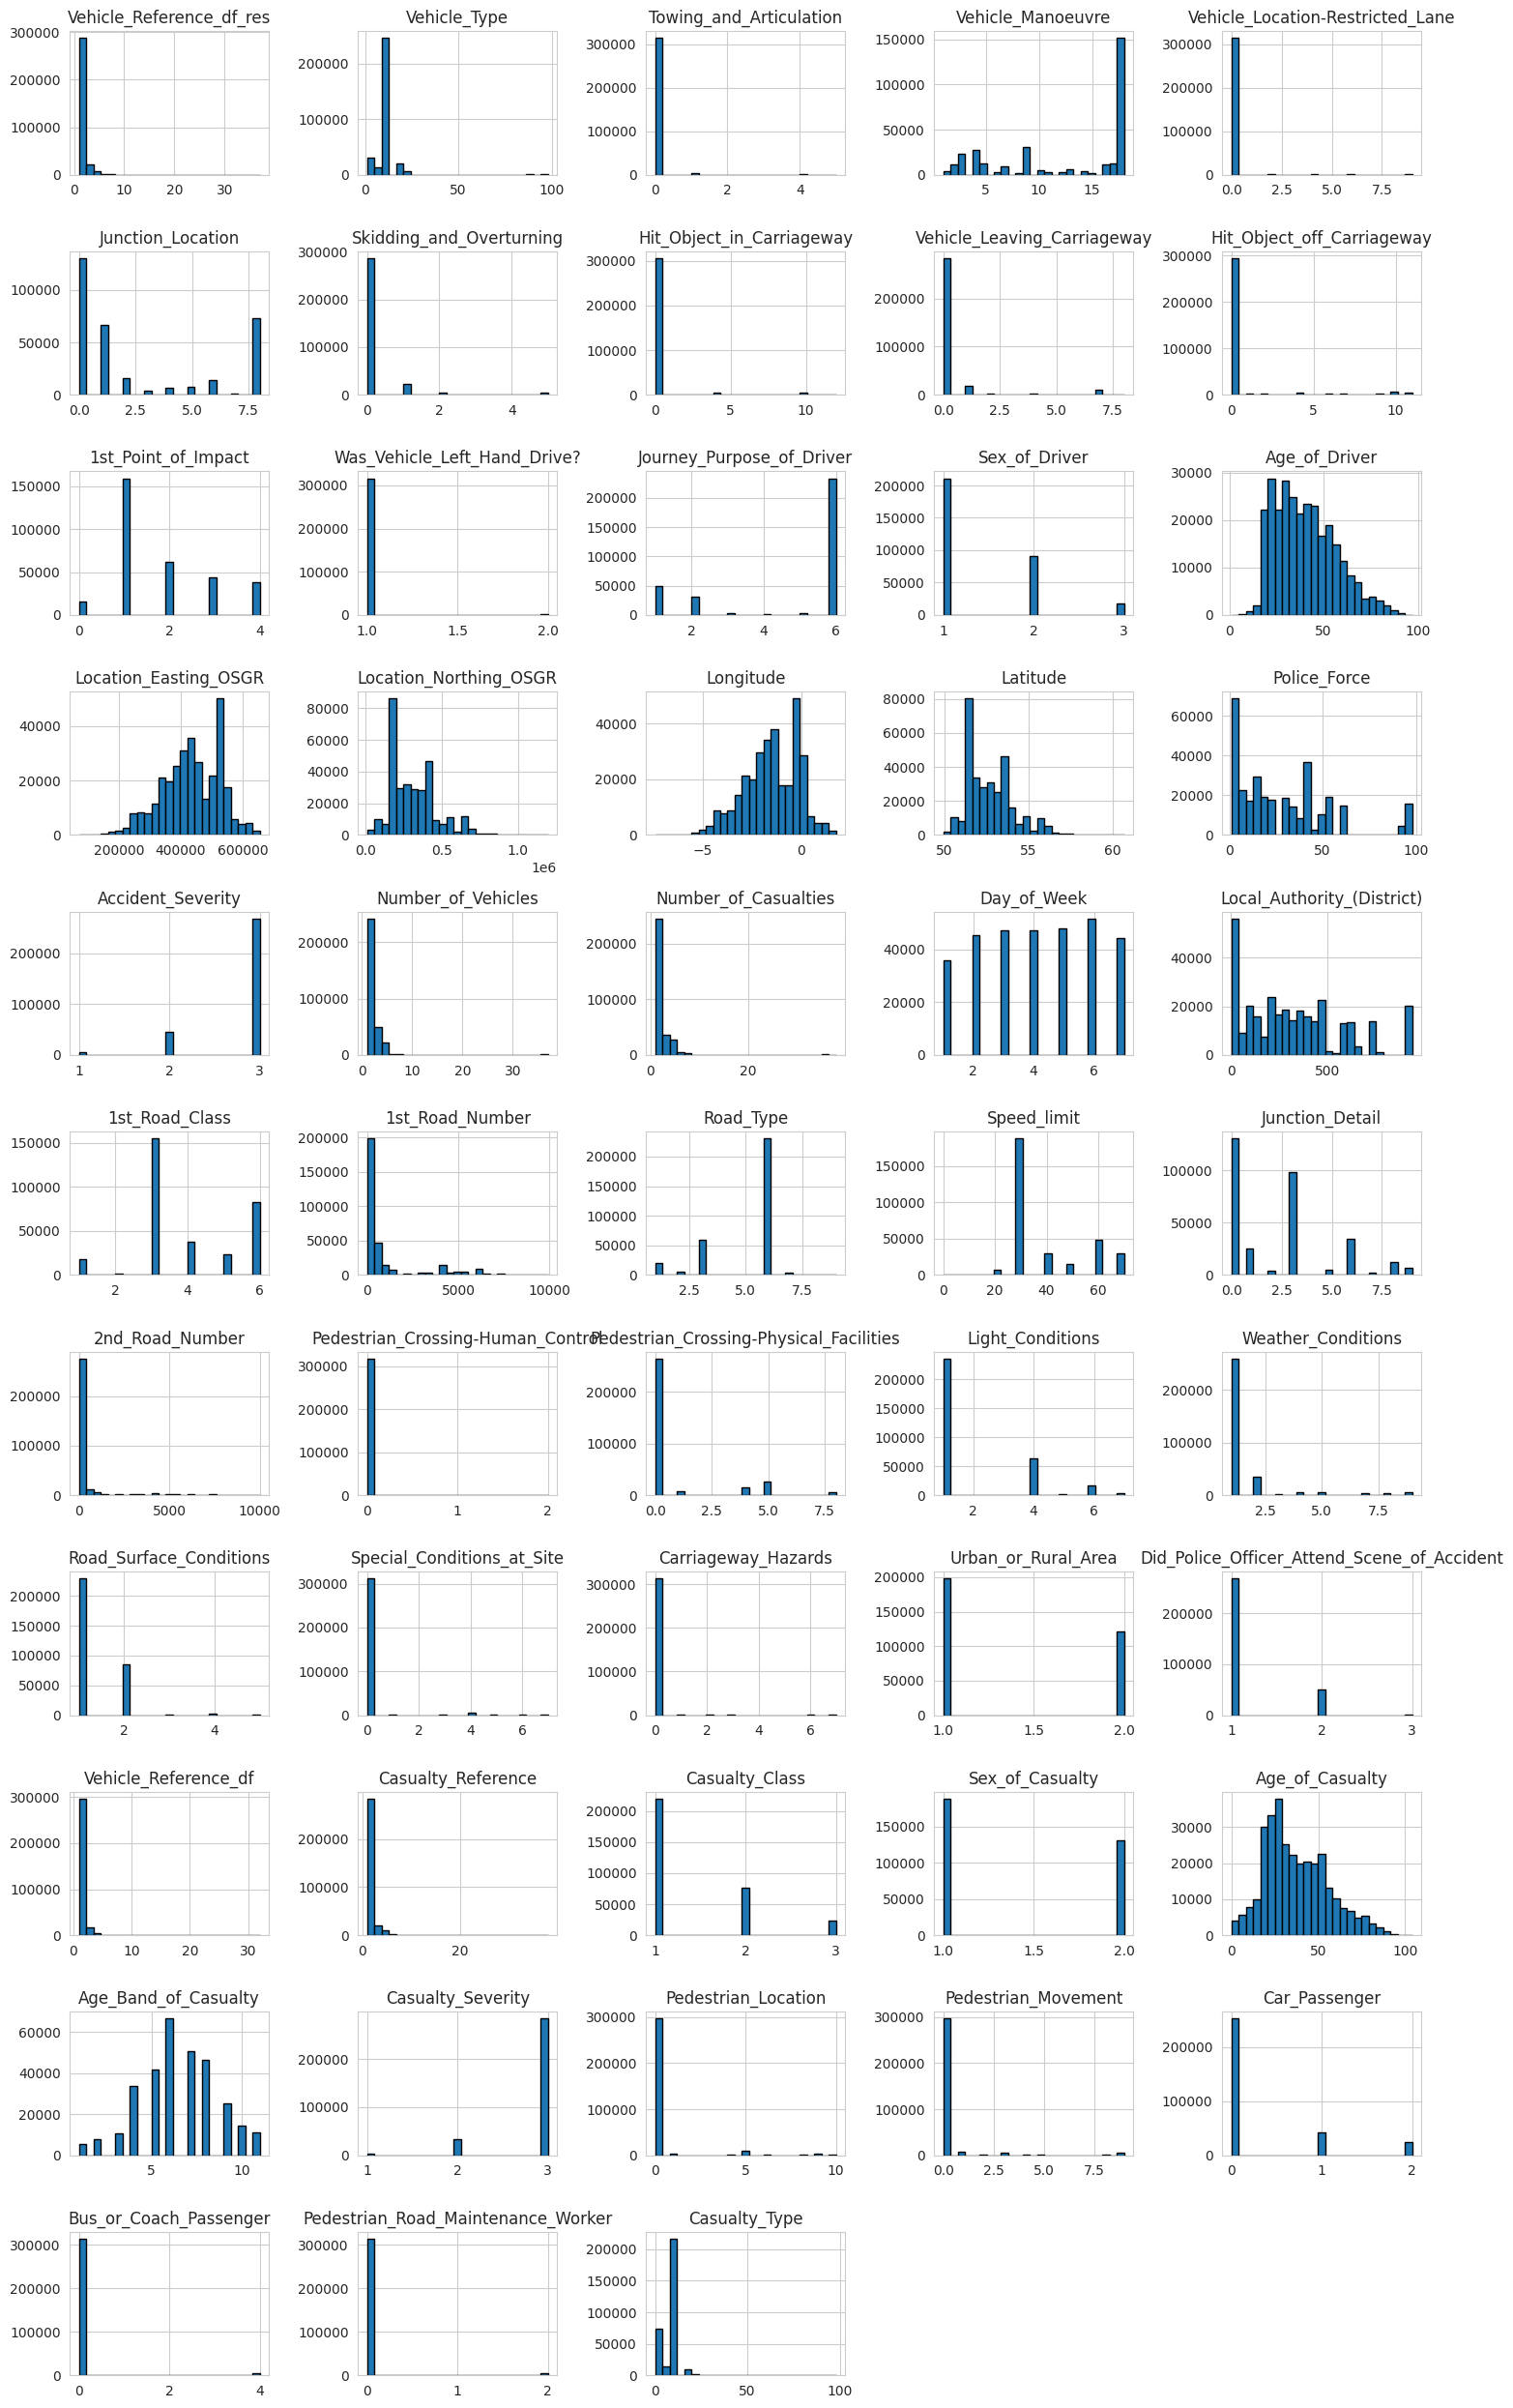

In [ ]:
# Feature Distribution
%%time
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5),
edgecolor="black")
plt.tight_layout();

Pedestrian_Crossing-Human_Control     0.995291
Was_Vehicle_Left_Hand_Drive?          0.990103
Towing_and_Articulation               0.982823
Vehicle_Location-Restricted_Lane      0.982207
Pedestrian_Road_Maintenance_Worker    0.981322
dtype: float64

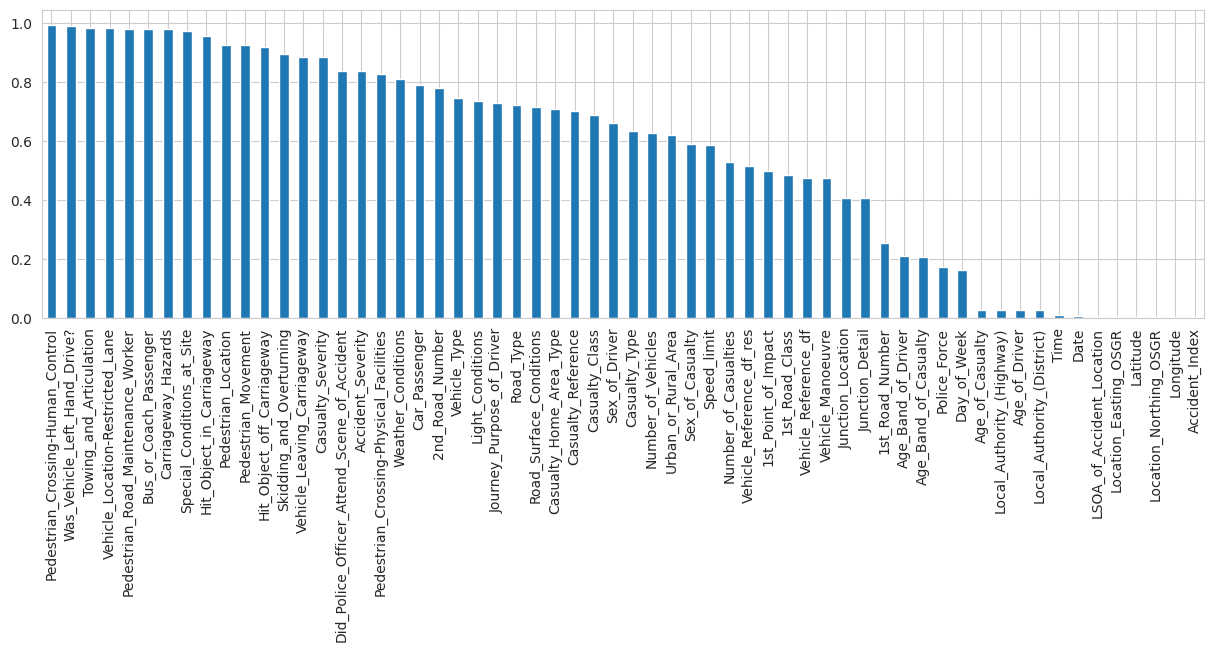

In [ ]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()
# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)
# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)
# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())
# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

In [ ]:
display(df_freq.head(15))

Pedestrian_Crossing-Human_Control     0.995291
Was_Vehicle_Left_Hand_Drive?          0.990103
Towing_and_Articulation               0.982823
Vehicle_Location-Restricted_Lane      0.982207
Pedestrian_Road_Maintenance_Worker    0.981322
Bus_or_Coach_Passenger                0.980947
Carriageway_Hazards                   0.979590
Special_Conditions_at_Site            0.974755
Hit_Object_in_Carriageway             0.957194
Pedestrian_Location                   0.927033
Pedestrian_Movement                   0.927015
Hit_Object_off_Carriageway            0.919019
Skidding_and_Overturning              0.895263
Vehicle_Leaving_Carriageway           0.886941
Casualty_Severity                     0.886169
dtype: float64

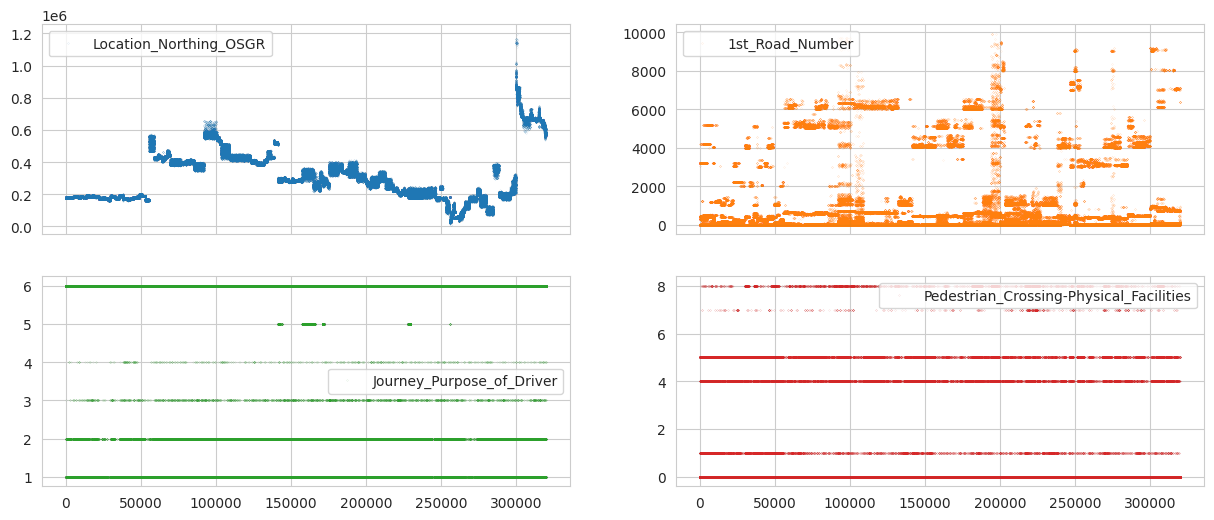

In [ ]:
# Feature Patterns
df_X[["Location_Northing_OSGR", "1st_Road_Number","Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(

lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1,
figsize=(15, 6));

In [ ]:
# treat features with less than 25
# unique features as discrete or ordinal features, and the other features as
# continuous features.

##Continuous

In [ ]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

CPU times: user 1min, sys: 2.16 s, total: 1min 2s
Wall time: 1min 3s


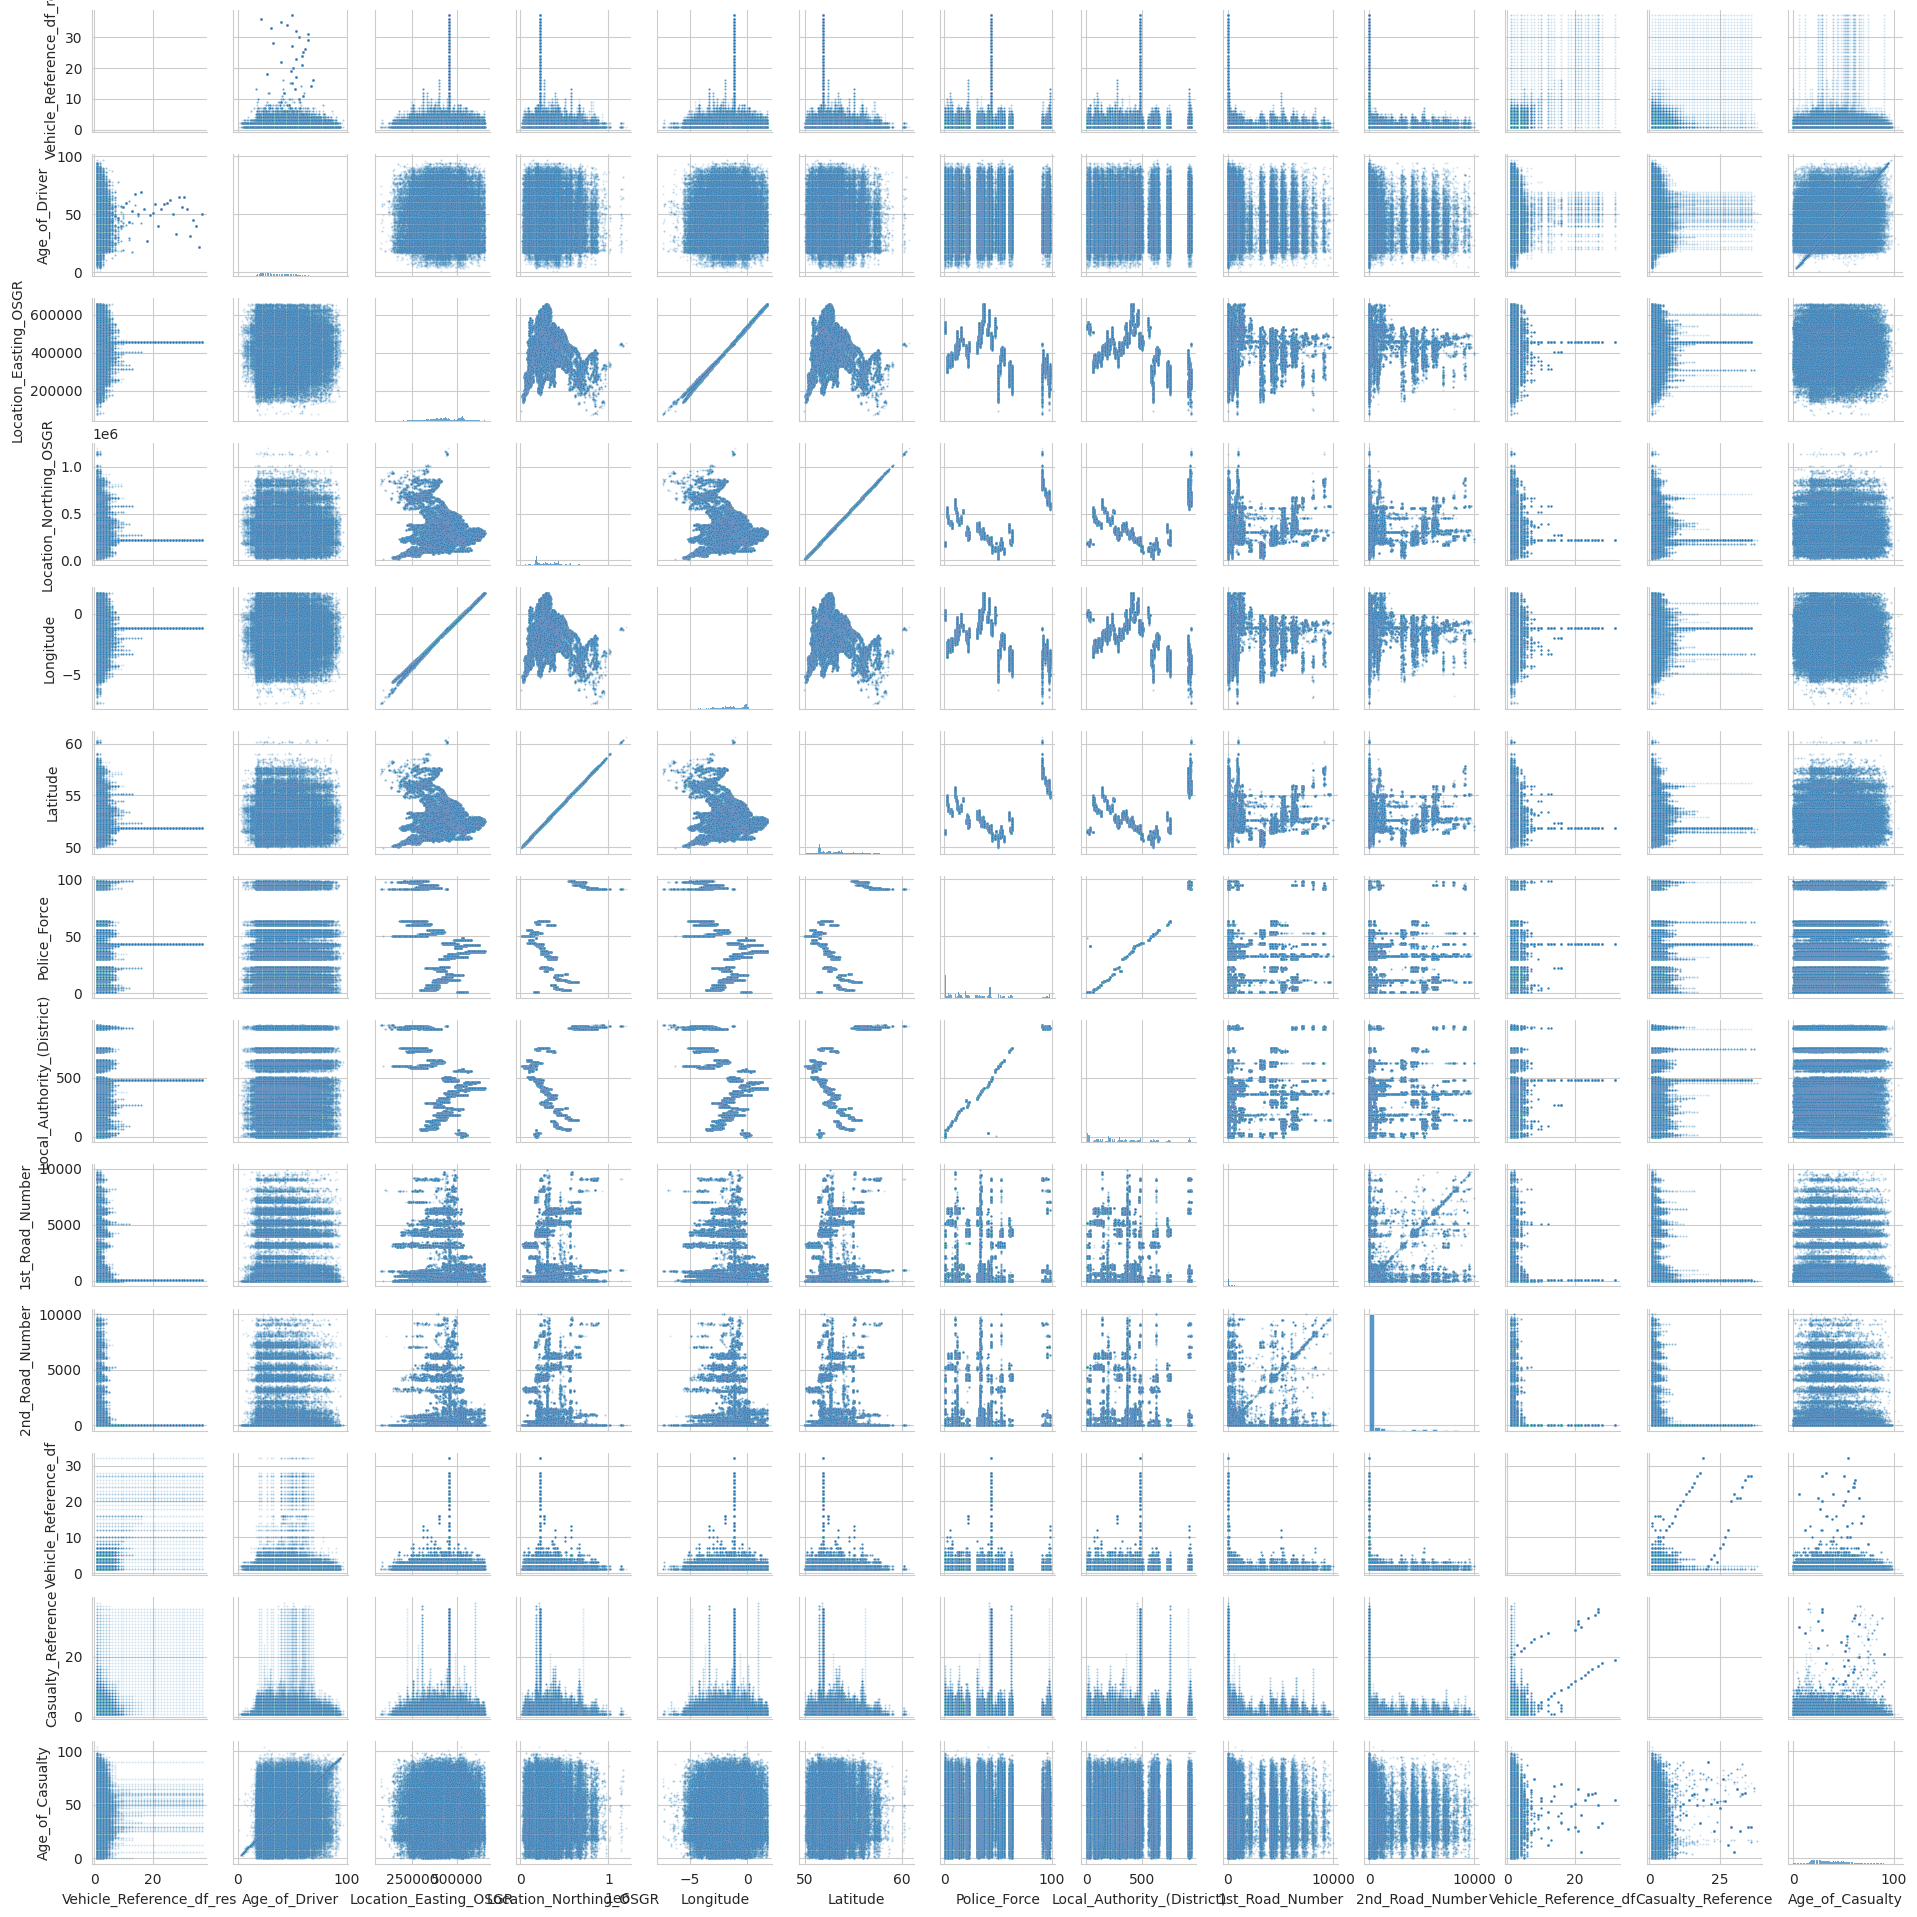

In [ ]:
# Analyze Continuous Features
%%time
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha":0.2});

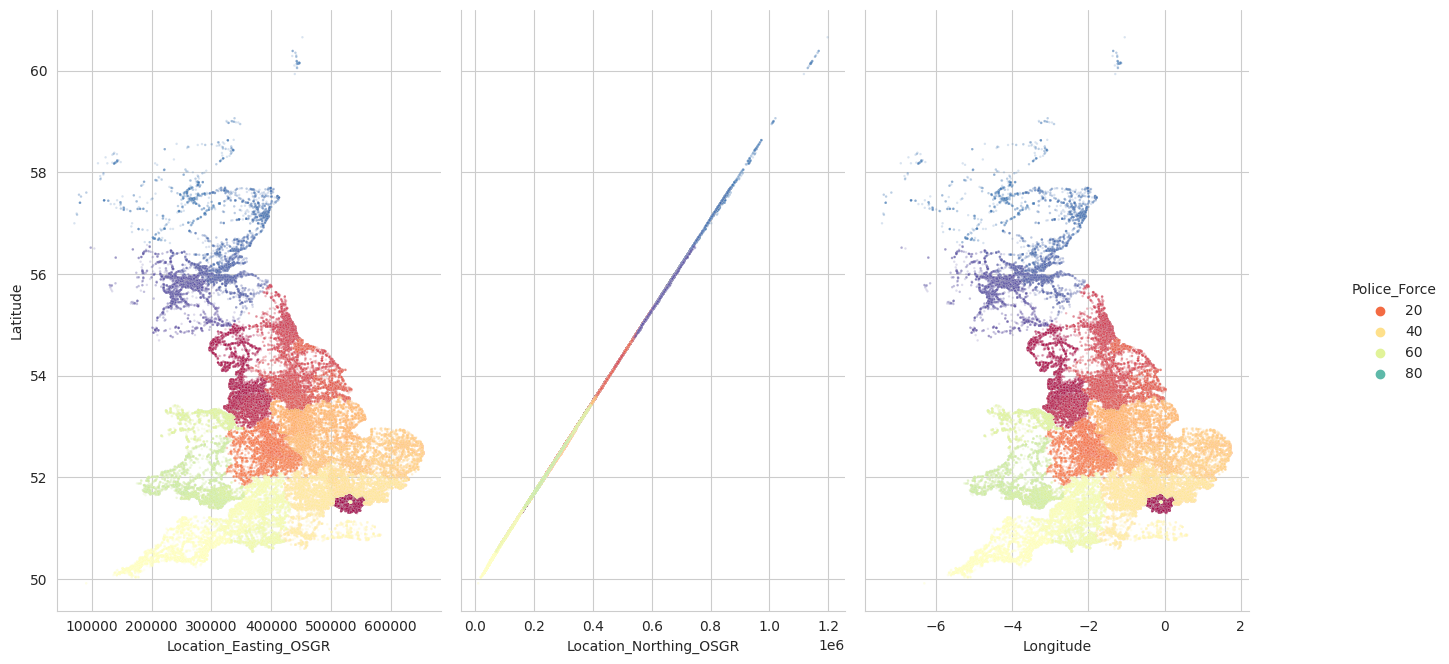

In [ ]:
g = sns.pairplot(
df_X, plot_kws={'s': 3, 'alpha': 0.2}, hue='Police_Force',
palette='Spectral',
x_vars=['Location_Easting_OSGR', 'Location_Northing_OSGR',
'Longitude'],
y_vars='Latitude');
g.fig.set_size_inches(15,8)

##Discrete (less than 25 unique values)

In [ ]:
# Discrete and Ordinal Features
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(319790, 40)

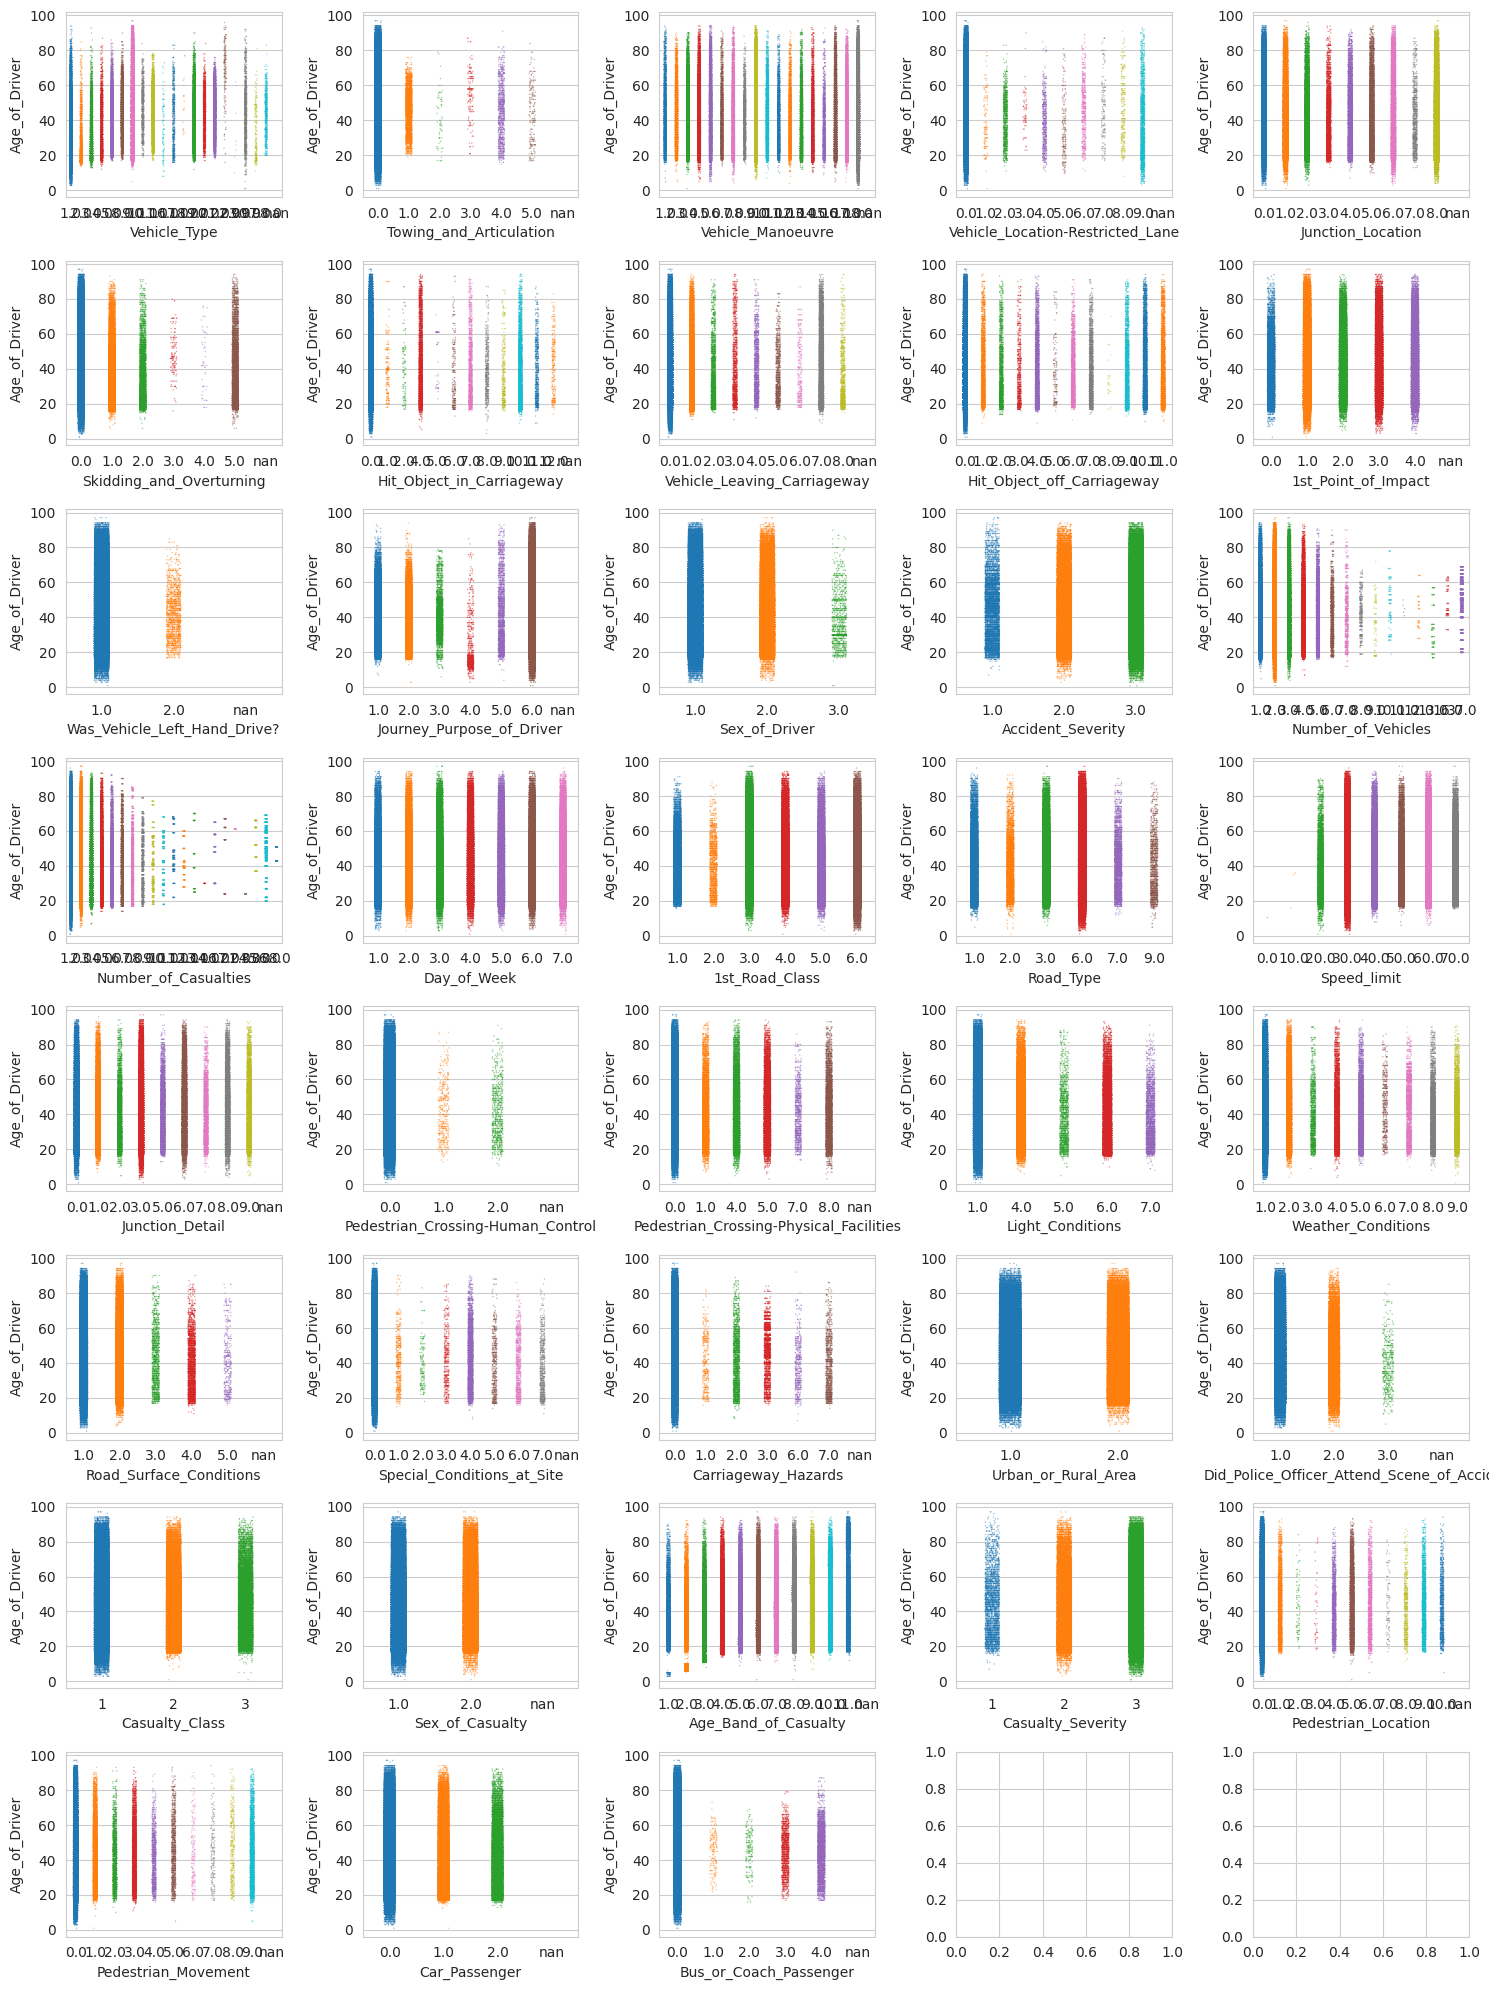

In [ ]:
# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15,n_rows * 2.5))
# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
  sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10",size=1, alpha=0.5)
  plt.tight_layout();

In [ ]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
  sns.violinplot(data=df_X, x=col, y=df_X["Latitude"],palette="Set2",split=True,hue="Urban_or_Rural_Area", ax=ax)
  plt.tight_layout()